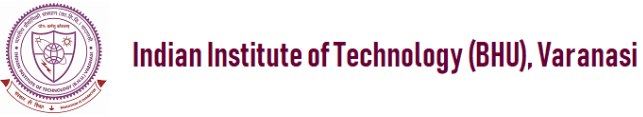
<h1><center><span style="color:green">Productivity Prediction </span> </center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
import seaborn as sns
df=pd.read_csv("D:/JSW/validation/TI and Productivity.csv")

In [3]:
df.head()

,"Fe, %","FeO, %","SiO2, %","Al2O3, %","CaO, %","MnO, %","C, %","S, %","P, %",CaO/SiO2,Al2O3/SiO2,(CaO+MgO)/SiO2,"Cumu.+10mm,%","Mean size,mm","-100#, %",MPS (Raw mix) before moisture addition,LOI %,MOI%,Avg. machine speed,Avg. furnace temp.,WG fan speed (RPM),ESP inlet temp.,Avg. moisture at 2007 C,"Sinter M/C bed height,mm",Al2O3 (Iron ore fines),SiO2(Iron ore fines),WB16B temp.,Net Productivity,Coke particle (-3.15 mm),Cooler temp.deg C,"MgO, %",Limestone (-3.15 mm),Dolomite (-3.15 mm),"TI(+6.3mm), %","RDI(-3.15 mm), %","Productivity,t/m2/d"
0,54.58,9.00,5.49,3.96,10.87,0.18,0.02,0.01,0.05,1.98,0.72,2.37,66.66,17.35,37.28,2.79,3.21,4.71,2.18,1230.59,866.88,148.97,6.67,682.16,4.28,5.38,354.22,29.71,93.19,129.04,2.10,96.70,97.55,75.56,24.3,36.67
1,54.59,10.31,5.41,3.79,11.22,0.11,0.02,0.01,0.05,2.08,0.70,2.49,66.44,17.41,34.72,3.17,3.12,3.78,2.12,1228.04,889.32,138.66,6.44,678.33,4.13,5.37,317.92,30.55,96.82,167.71,2.20,97.91,97.08,76.23,28.2,37.62
2,55.10,9.57,5.14,4.12,10.30,0.19,0.02,0.01,0.05,2.00,0.80,2.43,66.44,17.55,31.54,3.83,3.26,3.97,2.01,1236.01,888.28,138.58,6.48,671.45,4.46,4.38,298.59,28.53,96.29,131.36,2.18,97.26,97.94,75.45,25.1,35.10
3,55.07,9.84,5.19,3.74,10.65,0.11,0.02,0.01,0.05,2.05,0.72,2.47,65.69,17.37,33.67,3.24,3.63,4.35,2.08,1231.97,890.00,142.25,6.59,670.79,4.34,4.05,304.53,28.75,95.27,143.89,2.19,97.66,97.52,76.18,NaN,35.71
4,53.56,10.15,5.83,4.78,11.19,0.12,0.02,0.01,0.05,1.92,0.82,2.30,65.85,17.81,35.79,3.25,3.34,4.14,2.23,1225.16,885.82,143.92,6.74,677.09,5.00,6.29,326.95,30.06,96.43,155.08,2.23,98.13,97.62,75.77,24.3,37.00


In [4]:
df.shape

(1410, 36)

In [5]:
df.isnull().sum()

Fe, %                                       0
FeO, %                                      0
SiO2, %                                     0
Al2O3, %                                    0
CaO, %                                      0
MnO, %                                      0
C, %                                        0
S, %                                        0
P, %                                        0
CaO/SiO2                                    0
Al2O3/SiO2                                  0
(CaO+MgO)/SiO2                              0
Cumu.+10mm,%                                0
Mean size,mm                                0
-100#, %                                    0
MPS (Raw mix) before moisture addition      0
LOI %                                       0
MOI%                                        0
Avg. machine speed                          0
Avg. furnace temp.                          0
WG fan speed (RPM)                          0
ESP inlet temp.                   

In [6]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', 'Mean size,mm', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Net Productivity',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C', 'MgO, %',
       'Limestone (-3.15 mm)', 'Dolomite (-3.15 mm)', 'TI(+6.3mm), %',
       'RDI(-3.15 mm), %', 'Productivity,t/m2/d'],
      dtype='object')

In [7]:
df.drop(['Mean size,mm','Net Productivity','RDI(-3.15 mm), %'],axis=1,inplace=True)

<AxesSubplot:>

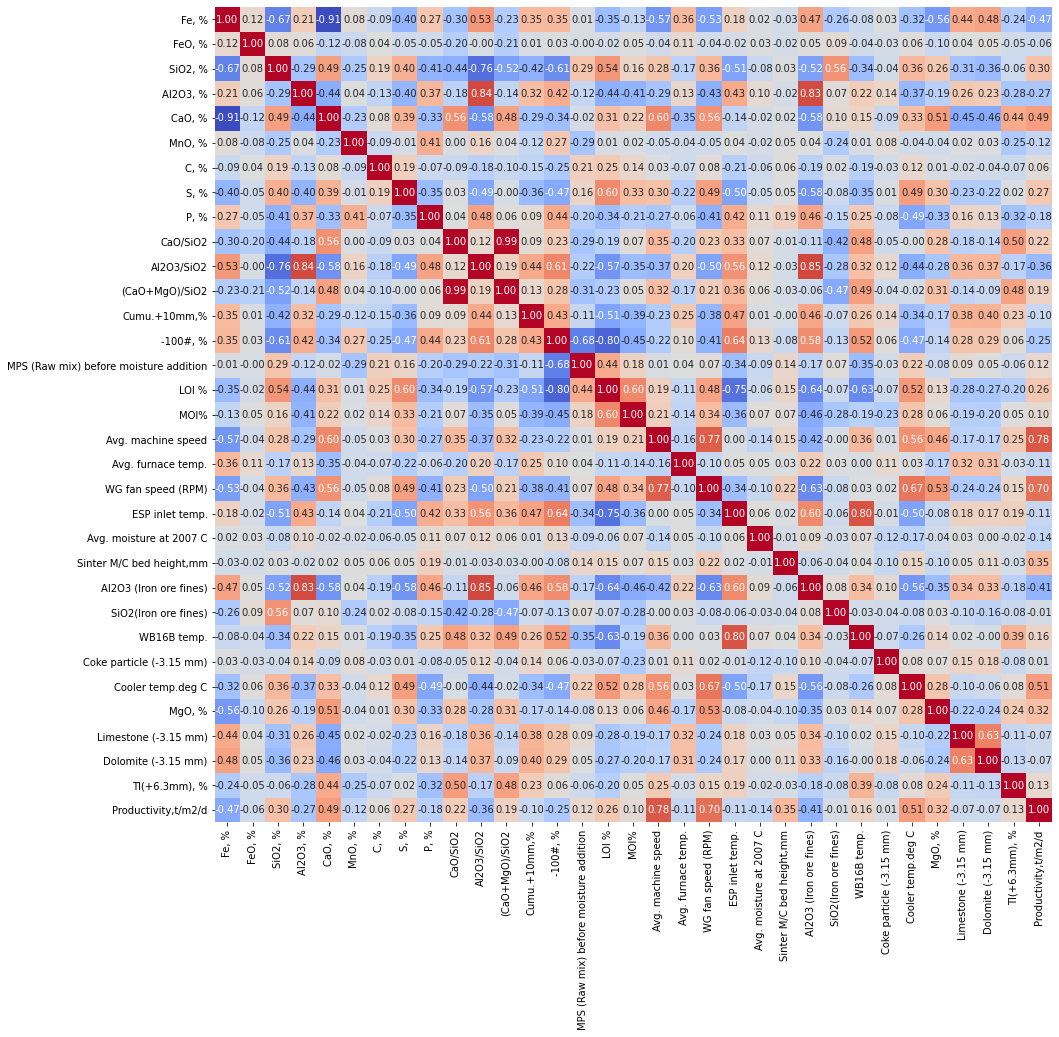

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

In [9]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', '-100#, %', 'MPS (Raw mix) before moisture addition',
       'LOI %', 'MOI%', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', 'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)', 'TI(+6.3mm), %', 'Productivity,t/m2/d'],
      dtype='object')

In [10]:
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
log=[]
for i in range(0,40,1):
    X=df[['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)']]
    y=df[['Productivity,t/m2/d']]
    X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=i)
    reg=ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    rr=r2_score(y_test,y_pred)
    print([rr,i])
    log.append(rr)

[0.8537058731253716, 0]
[0.8557497930472009, 1]
[0.8341393648458268, 2]
[0.856654242468561, 3]
[0.8559108345386539, 4]
[0.825098541946983, 5]
[0.8673474868867995, 6]
[0.7327230699028701, 7]
[0.8846321961866653, 8]
[0.8523691434440411, 9]
[0.8912839394645968, 10]
[0.7394556343217094, 11]
[0.7577155485083982, 12]
[0.7929107751290743, 13]
[0.5264468598564798, 14]
[0.9089818387212285, 15]
[0.8499487196048721, 16]
[0.8401769480526127, 17]
[0.7114189846964314, 18]
[0.919085743066213, 19]
[0.8615810654855742, 20]
[0.8347556076913147, 21]
[0.8683633727856699, 22]
[0.8171879422342877, 23]
[0.8005064544659127, 24]
[0.7762280653052445, 25]
[0.8419114471254857, 26]
[0.8294376938083036, 27]
[0.8533477176339549, 28]
[0.8645276778642746, 29]
[0.864861807524557, 30]
[0.7383348229229514, 31]
[0.7826590052912104, 32]
[0.834764753456451, 33]
[0.8645190077702678, 34]
[0.80993629640148, 35]
[0.8743977292119083, 36]
[0.7854230953835855, 37]
[0.7815926095457992, 38]
[0.7089802737538033, 39]


In [11]:
sum(log)/len(log)

0.8187267995869156

In [12]:
max(log)

0.919085743066213

In [13]:
X_train.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)'],
      dtype='object')

In [14]:
sum(log)/len(log)

0.8187267995869156

In [15]:
from sklearn.model_selection import cross_validate


Elapsed time to compute the importances: 0.001 seconds
Elapsed time to compute the importances: 38.012 seconds


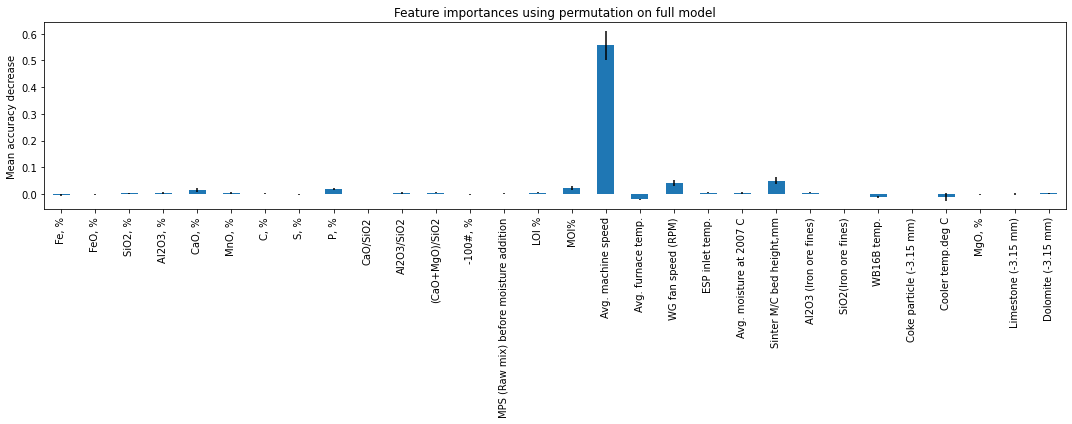

In [16]:
from sklearn.inspection import permutation_importance
import time
import numpy as np

start_time = time.time()

elapsed_time = time.time() - start_time
feature_names=X_train.columns
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Elapsed time to compute the importances: 0.117 seconds


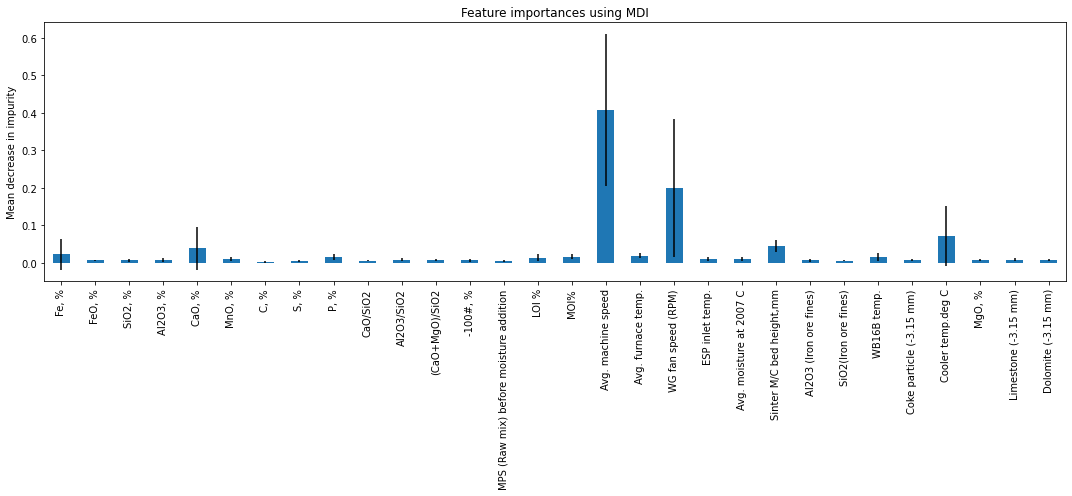

In [17]:
start_time = time.time()
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', '-100#, %', 'MPS (Raw mix) before moisture addition',
       'LOI %', 'MOI%', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', 'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)', 'TI(+6.3mm), %', 'Productivity,t/m2/d'],
      dtype='object')

In [19]:
X=df[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %',  'P, %', 'Al2O3/SiO2', '(CaO+MgO)/SiO2','LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm',  'WB16B temp.', 'Cooler temp.deg C']]
y=df[['Productivity,t/m2/d']]
log=[]
for i in range(0,40,1):
    X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=i)
    reg=ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(r2,i)
    log.append(r2)


0.8598183879509795 0
0.868517918199839 1
0.8417373589979741 2
0.8595246097575511 3
0.8562362198485297 4
0.8156859600206282 5
0.8664558670893385 6
0.7461409490548592 7
0.8861942993475691 8
0.8461691321931551 9
0.8902273624706553 10
0.7475868396701205 11
0.7828631779996139 12
0.7982210403524943 13
0.5085191917071754 14
0.9152623355540066 15
0.8513742251822999 16
0.8383346499576536 17
0.7180207418876594 18
0.9198614588458158 19
0.8659495208481498 20
0.840212701258433 21
0.8755146874764618 22
0.8019530090347982 23
0.7938265645369533 24
0.7906344286957108 25
0.846092295824573 26
0.8264715525094808 27
0.8569668576818572 28
0.8741490119260247 29
0.8675730587076955 30
0.7557932418773485 31
0.8091077621180386 32
0.8414292631119011 33
0.853712188120292 34
0.8139631410248485 35
0.8890429435165252 36
0.8004222933164531 37
0.7799870199740382 38
0.7043811276728033 39


In [20]:
sum(log)/len(log)

0.8225983598830077

In [21]:
X=df[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %',  'P, %', 'Al2O3/SiO2', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm',  'WB16B temp.', 'Cooler temp.deg C']]
y=df[['Productivity,t/m2/d']]

X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=15)

In [22]:
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [23]:
model.score(X_test,y_test)

0.9179862992130499

In [24]:
y_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

0.752622257263006

In [26]:
model.score(X_train,y_train)

1.0

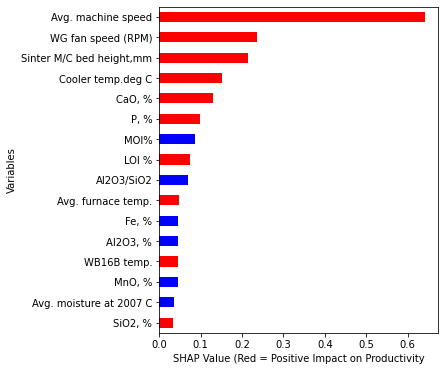

In [27]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on Productivity")
    
ABS_SHAP(shap_values,X_train) 

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [29]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=2),
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    "MultiO/P GBR" :GradientBoostingRegressor(random_state=2),
    "MultiO/P AdaB" :AdaBoostRegressor(random_state=2),
    "xgbr":xgb.XGBRegressor(objective='reg:squarederror',random_state=2)
    
}

In [30]:
y_test_predict = dict()
y_mse = dict()
score=dict()
score_train=dict()

for name,estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    
    score[name]=estimator.score(X_test,y_test)
    score_train[name]=estimator.score(X_train,y_train)

In [31]:
score

{'Extra trees': 0.9170708000517654,
 'K-nn': 0.8500524338038292,
 'Linear regression': 0.8272297393280865,
 'Ridge': 0.831862405137447,
 'Lasso': 0.667739114634029,
 'ElasticNet': 0.671087023224185,
 'RandomForestRegressor': 0.9043077761161341,
 'Decision Tree Regressor': 0.7914001582828027,
 'MultiO/P GBR': 0.9044212052125903,
 'MultiO/P AdaB': 0.8434863012027033,
 'xgbr': 0.8921215982805658}

In [32]:
score_train

{'Extra trees': 1.0,
 'K-nn': 0.8027215368701549,
 'Linear regression': 0.7082065430566769,
 'Ridge': 0.7058610448527048,
 'Lasso': 0.540033056946627,
 'ElasticNet': 0.5409285528727821,
 'RandomForestRegressor': 0.9714609256533123,
 'Decision Tree Regressor': 1.0,
 'MultiO/P GBR': 0.8905573594035264,
 'MultiO/P AdaB': 0.7773572165173829,
 'xgbr': 0.9986310740165297}

In [33]:
import catboost as cb

In [34]:
model_CBR = cb.CatBoostRegressor()
model_CBR.fit(X_train, y_train)


Learning rate set to 0.040721
0:	learn: 1.9915868	total: 285ms	remaining: 4m 44s
1:	learn: 1.9471652	total: 304ms	remaining: 2m 31s
2:	learn: 1.9086397	total: 322ms	remaining: 1m 46s
3:	learn: 1.8666438	total: 340ms	remaining: 1m 24s
4:	learn: 1.8279732	total: 351ms	remaining: 1m 9s
5:	learn: 1.7898416	total: 361ms	remaining: 59.8s
6:	learn: 1.7578253	total: 375ms	remaining: 53.3s
7:	learn: 1.7262190	total: 387ms	remaining: 48s
8:	learn: 1.6957078	total: 404ms	remaining: 44.5s
9:	learn: 1.6643814	total: 418ms	remaining: 41.4s
10:	learn: 1.6342783	total: 434ms	remaining: 39s
11:	learn: 1.6044110	total: 443ms	remaining: 36.5s
12:	learn: 1.5802271	total: 453ms	remaining: 34.4s
13:	learn: 1.5528487	total: 464ms	remaining: 32.7s
14:	learn: 1.5296762	total: 481ms	remaining: 31.6s
15:	learn: 1.5084784	total: 491ms	remaining: 30.2s
16:	learn: 1.4869730	total: 502ms	remaining: 29s
17:	learn: 1.4658962	total: 513ms	remaining: 28s
18:	learn: 1.4433492	total: 523ms	remaining: 27s
19:	learn: 1.4230

161:	learn: 0.7661947	total: 2.66s	remaining: 13.7s
162:	learn: 0.7652345	total: 2.67s	remaining: 13.7s
163:	learn: 0.7632056	total: 2.69s	remaining: 13.7s
164:	learn: 0.7625622	total: 2.71s	remaining: 13.7s
165:	learn: 0.7619787	total: 2.73s	remaining: 13.7s
166:	learn: 0.7608882	total: 2.76s	remaining: 13.8s
167:	learn: 0.7597041	total: 2.8s	remaining: 13.9s
168:	learn: 0.7588149	total: 2.83s	remaining: 13.9s
169:	learn: 0.7586187	total: 2.84s	remaining: 13.9s
170:	learn: 0.7577512	total: 2.85s	remaining: 13.8s
171:	learn: 0.7566159	total: 2.88s	remaining: 13.9s
172:	learn: 0.7555769	total: 2.9s	remaining: 13.9s
173:	learn: 0.7541345	total: 2.91s	remaining: 13.8s
174:	learn: 0.7521834	total: 2.92s	remaining: 13.8s
175:	learn: 0.7514106	total: 2.94s	remaining: 13.8s
176:	learn: 0.7500372	total: 2.95s	remaining: 13.7s
177:	learn: 0.7482798	total: 2.96s	remaining: 13.7s
178:	learn: 0.7477832	total: 2.98s	remaining: 13.6s
179:	learn: 0.7462917	total: 2.99s	remaining: 13.6s
180:	learn: 0.

327:	learn: 0.6124538	total: 5.13s	remaining: 10.5s
328:	learn: 0.6113823	total: 5.14s	remaining: 10.5s
329:	learn: 0.6104072	total: 5.15s	remaining: 10.5s
330:	learn: 0.6092805	total: 5.17s	remaining: 10.4s
331:	learn: 0.6089110	total: 5.18s	remaining: 10.4s
332:	learn: 0.6075540	total: 5.19s	remaining: 10.4s
333:	learn: 0.6072146	total: 5.2s	remaining: 10.4s
334:	learn: 0.6063497	total: 5.21s	remaining: 10.3s
335:	learn: 0.6057243	total: 5.22s	remaining: 10.3s
336:	learn: 0.6056834	total: 5.23s	remaining: 10.3s
337:	learn: 0.6056187	total: 5.24s	remaining: 10.3s
338:	learn: 0.6039786	total: 5.25s	remaining: 10.2s
339:	learn: 0.6030764	total: 5.26s	remaining: 10.2s
340:	learn: 0.6021260	total: 5.27s	remaining: 10.2s
341:	learn: 0.6016504	total: 5.28s	remaining: 10.2s
342:	learn: 0.6015993	total: 5.29s	remaining: 10.1s
343:	learn: 0.6008281	total: 5.3s	remaining: 10.1s
344:	learn: 0.5998987	total: 5.32s	remaining: 10.1s
345:	learn: 0.5982776	total: 5.33s	remaining: 10.1s
346:	learn: 0.

488:	learn: 0.4993938	total: 7.07s	remaining: 7.38s
489:	learn: 0.4983025	total: 7.08s	remaining: 7.37s
490:	learn: 0.4982444	total: 7.1s	remaining: 7.36s
491:	learn: 0.4978062	total: 7.11s	remaining: 7.34s
492:	learn: 0.4968810	total: 7.12s	remaining: 7.32s
493:	learn: 0.4962878	total: 7.13s	remaining: 7.3s
494:	learn: 0.4961797	total: 7.13s	remaining: 7.28s
495:	learn: 0.4955962	total: 7.14s	remaining: 7.26s
496:	learn: 0.4953355	total: 7.16s	remaining: 7.24s
497:	learn: 0.4948092	total: 7.16s	remaining: 7.22s
498:	learn: 0.4942172	total: 7.18s	remaining: 7.21s
499:	learn: 0.4941244	total: 7.19s	remaining: 7.19s
500:	learn: 0.4938296	total: 7.2s	remaining: 7.17s
501:	learn: 0.4936055	total: 7.21s	remaining: 7.16s
502:	learn: 0.4930493	total: 7.22s	remaining: 7.14s
503:	learn: 0.4923550	total: 7.23s	remaining: 7.12s
504:	learn: 0.4914496	total: 7.25s	remaining: 7.1s
505:	learn: 0.4905395	total: 7.26s	remaining: 7.09s
506:	learn: 0.4899584	total: 7.27s	remaining: 7.07s
507:	learn: 0.48

647:	learn: 0.4254752	total: 8.99s	remaining: 4.88s
648:	learn: 0.4251537	total: 9.01s	remaining: 4.87s
649:	learn: 0.4245905	total: 9.03s	remaining: 4.86s
650:	learn: 0.4240596	total: 9.04s	remaining: 4.84s
651:	learn: 0.4234546	total: 9.05s	remaining: 4.83s
652:	learn: 0.4232846	total: 9.06s	remaining: 4.82s
653:	learn: 0.4229080	total: 9.08s	remaining: 4.8s
654:	learn: 0.4222602	total: 9.09s	remaining: 4.79s
655:	learn: 0.4217166	total: 9.1s	remaining: 4.77s
656:	learn: 0.4211833	total: 9.12s	remaining: 4.76s
657:	learn: 0.4208309	total: 9.13s	remaining: 4.75s
658:	learn: 0.4202564	total: 9.14s	remaining: 4.73s
659:	learn: 0.4197422	total: 9.16s	remaining: 4.72s
660:	learn: 0.4193381	total: 9.18s	remaining: 4.71s
661:	learn: 0.4191026	total: 9.19s	remaining: 4.69s
662:	learn: 0.4188394	total: 9.2s	remaining: 4.68s
663:	learn: 0.4182162	total: 9.22s	remaining: 4.67s
664:	learn: 0.4179168	total: 9.24s	remaining: 4.66s
665:	learn: 0.4174281	total: 9.26s	remaining: 4.64s
666:	learn: 0.4

815:	learn: 0.3628895	total: 11.6s	remaining: 2.62s
816:	learn: 0.3624649	total: 11.6s	remaining: 2.61s
817:	learn: 0.3620421	total: 11.6s	remaining: 2.59s
818:	learn: 0.3617661	total: 11.7s	remaining: 2.58s
819:	learn: 0.3617151	total: 11.7s	remaining: 2.56s
820:	learn: 0.3615345	total: 11.7s	remaining: 2.54s
821:	learn: 0.3612523	total: 11.7s	remaining: 2.53s
822:	learn: 0.3605861	total: 11.7s	remaining: 2.52s
823:	learn: 0.3603373	total: 11.7s	remaining: 2.5s
824:	learn: 0.3600124	total: 11.7s	remaining: 2.48s
825:	learn: 0.3599781	total: 11.7s	remaining: 2.47s
826:	learn: 0.3596698	total: 11.7s	remaining: 2.45s
827:	learn: 0.3594527	total: 11.7s	remaining: 2.44s
828:	learn: 0.3590325	total: 11.8s	remaining: 2.42s
829:	learn: 0.3587026	total: 11.8s	remaining: 2.41s
830:	learn: 0.3583888	total: 11.8s	remaining: 2.39s
831:	learn: 0.3581350	total: 11.8s	remaining: 2.38s
832:	learn: 0.3576965	total: 11.8s	remaining: 2.36s
833:	learn: 0.3573165	total: 11.8s	remaining: 2.35s
834:	learn: 0

979:	learn: 0.3126603	total: 13.6s	remaining: 277ms
980:	learn: 0.3125163	total: 13.6s	remaining: 263ms
981:	learn: 0.3120607	total: 13.6s	remaining: 249ms
982:	learn: 0.3116607	total: 13.6s	remaining: 235ms
983:	learn: 0.3114312	total: 13.6s	remaining: 221ms
984:	learn: 0.3111032	total: 13.6s	remaining: 208ms
985:	learn: 0.3109213	total: 13.6s	remaining: 194ms
986:	learn: 0.3104507	total: 13.7s	remaining: 180ms
987:	learn: 0.3102132	total: 13.7s	remaining: 166ms
988:	learn: 0.3100404	total: 13.7s	remaining: 152ms
989:	learn: 0.3099391	total: 13.7s	remaining: 138ms
990:	learn: 0.3096013	total: 13.7s	remaining: 124ms
991:	learn: 0.3093121	total: 13.7s	remaining: 111ms
992:	learn: 0.3090906	total: 13.7s	remaining: 96.7ms
993:	learn: 0.3089304	total: 13.7s	remaining: 82.8ms
994:	learn: 0.3085358	total: 13.7s	remaining: 69ms
995:	learn: 0.3083263	total: 13.8s	remaining: 55.2ms
996:	learn: 0.3075757	total: 13.8s	remaining: 41.4ms
997:	learn: 0.3074533	total: 13.8s	remaining: 27.6ms
998:	lea

In [35]:
y_pred = model_CBR.predict(X_test)

In [130]:
mean_squared_error(y_test,y_pred,squared=False)

0.7499715687679512

In [36]:
r2_score(y_test,y_pred)

0.9185629761559566

In [37]:
y_pred1 = model_CBR.predict(X_train)
r2_score(y_train,y_pred1)

0.9773277958366875

In [38]:

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
rf.score(X_test,y_test)

0.9008159668547044

In [131]:
y_rf=rf.predict(X_test)
mean_squared_error(y_test,y_rf,squared=False)

0.8276652755605934

In [40]:
rf.score(X_train,y_train)

0.9723374058250628

In [41]:
xgbr=xgb.XGBRegressor(learning_rate=0.15,objective='reg:squarederror',random_state=2)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgbr.score(X_test,y_test)

0.9028362037976023

In [43]:
xgbr.score(X_train,y_train)

0.9855676156463755

In [44]:
y_et=model.predict(X_test)
y_et=pd.DataFrame(y_et)
y_cat=model_CBR.predict(X_test)
y_cat=pd.DataFrame(y_cat)
y_rf=rf.predict(X_test)
y_rf=pd.DataFrame(y_rf)


In [45]:
from scipy import stats
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_et.iloc[:,0])

LinregressResult(slope=0.8792190673025256, intercept=4.464754568493241, rvalue=0.9591874915012248, pvalue=3.9527224314514574e-78, stderr=0.02198471476596123, intercept_stderr=0.8072923107034893)

Text(0.5, 1.0, 'Testing Data: ETR model')

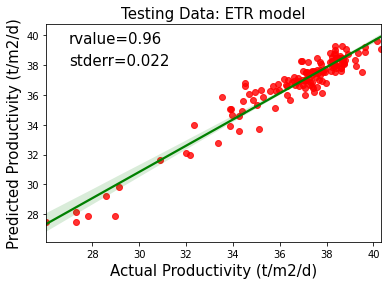

In [46]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Productivity (t/m2/d)", fontsize = 15)
YS.set_ylabel("Predicted Productivity (t/m2/d)", fontsize = 15)
ax.text(27,39.5, "rvalue=0.96", fontsize=15)
ax.text(27,38, "stderr=0.022", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: ETR model',fontsize=15)

In [47]:
linregress(y_test.iloc[:,0],y_rf.iloc[:,0])

LinregressResult(slope=0.8719855671340395, intercept=4.68712607150826, rvalue=0.9496326495318793, pvalue=6.351010953576513e-72, stderr=0.024406033678032027, intercept_stderr=0.8962046373033394)

Text(0.5, 1.0, 'Testing Data: RF model')

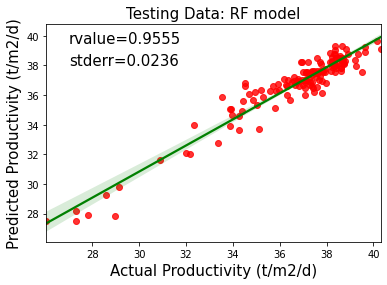

In [48]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Productivity (t/m2/d)", fontsize = 15)
YS.set_ylabel("Predicted Productivity (t/m2/d)", fontsize = 15)
ax.text(27,39.5, "rvalue=0.9555", fontsize=15)
ax.text(27,38, "stderr=0.0236", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: RF model',fontsize=15)

In [49]:
linregress(y_test.iloc[:,0],y_cat.iloc[:,0])

LinregressResult(slope=0.8824152952215807, intercept=4.332127418821429, rvalue=0.9592750925686667, pvalue=3.414684579082055e-78, stderr=0.022039423012702404, intercept_stderr=0.8093012313284046)

Text(0.5, 1.0, 'Testing Data: CBR model')

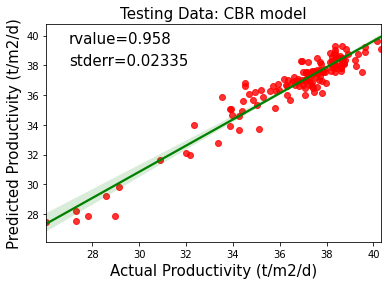

In [50]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Productivity (t/m2/d)", fontsize = 15)
YS.set_ylabel("Predicted Productivity (t/m2/d)", fontsize = 15)
ax.text(27,39.5, "rvalue=0.958", fontsize=15)
ax.text(27,38, "stderr=0.02335", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: CBR model',fontsize=15)

In [51]:
X_train.columns

Index(['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %',
       'Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.', 'WG fan speed (RPM)', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C'],
      dtype='object')

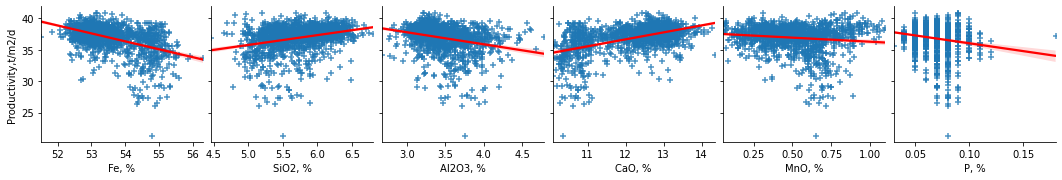

In [52]:
sns.pairplot(df,x_vars=['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %'],
            y_vars=['Productivity,t/m2/d'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')


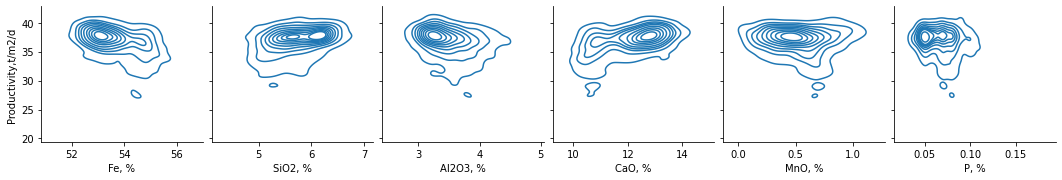

In [53]:
sns.pairplot(df,x_vars=['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %'],
            y_vars=['Productivity,t/m2/d'],kind='kde')


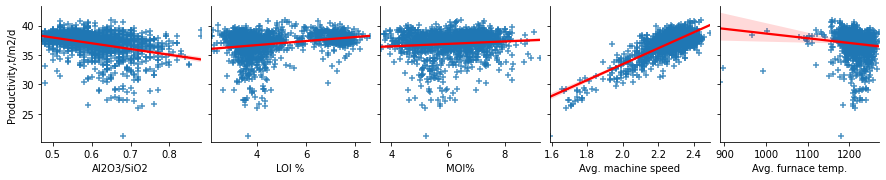

In [54]:
sns.pairplot(df,x_vars=['Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.' ],
            y_vars=['Productivity,t/m2/d'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')

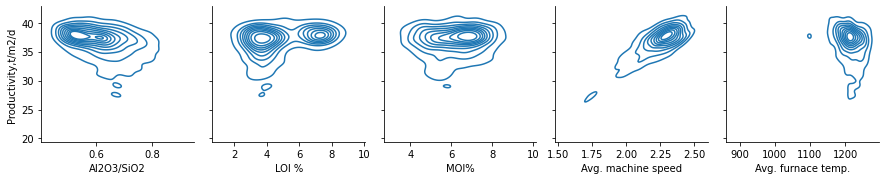

In [74]:
sns.pairplot(df,x_vars=['Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.' ],
            y_vars=['Productivity,t/m2/d'],kind='kde')

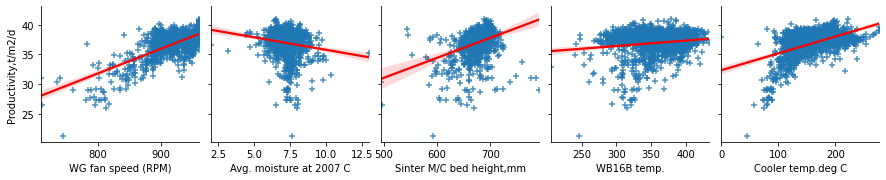

In [75]:
sns.pairplot(df,x_vars=['WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C'],
            y_vars=['Productivity,t/m2/d'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')

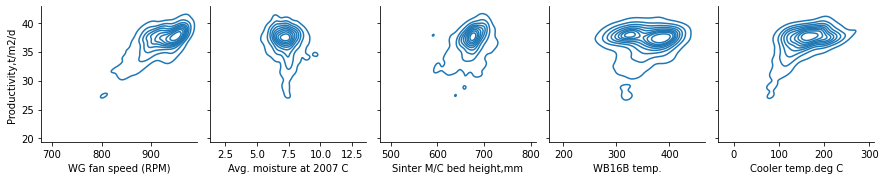

In [76]:
sns.pairplot(df,x_vars=['WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C'],
            y_vars=['Productivity,t/m2/d'],kind='kde')

In [77]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

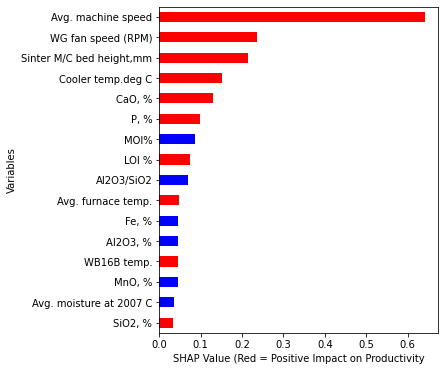

In [78]:
ABS_SHAP(shap_values,X_train) 

# Validation

In [116]:
prod=pd.read_csv("D:/JSW/validation/TI_prod_val.csv")


In [117]:
y_train.columns

Index(['Productivity,t/m2/d'], dtype='object')

In [118]:
xval=prod[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %',
       'Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.', 'WG fan speed (RPM)', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C']]
yval=prod[['Productivity,t/m2/d']]

In [119]:
ym=model.predict(xval)

In [120]:
ym=pd.DataFrame(ym)

Text(0.5, 1.0, 'Validation Data: ETR model')

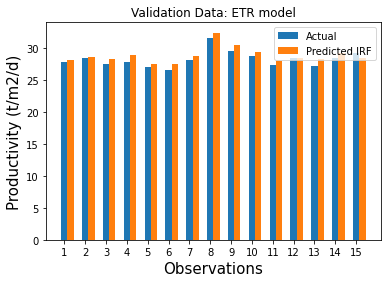

In [126]:
measured=yval.iloc[:,0]
predicted=ym.iloc[:,0]
x=[y for y in range(1,16,1)]
w=0.3

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,measured,w,label='Actual')
plt.bar(bar2,predicted,w,label='Predicted IRF')
plt.legend(loc='upper right')
plt.xticks(bar1,x)
plt.xlabel('Observations',fontsize=15)
plt.ylabel('Productivity (t/m2/d)',fontsize=15)
plt.title('Validation Data: ETR model')

In [122]:
mape_mean =np.mean(np.abs((yval.iloc[:,0] - ym.iloc[:,0])/yval.iloc[:,0]))*100
mape_mean

2.355245712884752

In [123]:
mape=np.abs((yval.iloc[:,0] - ym.iloc[:,0])/yval.iloc[:,0])*100
mape

0     1.193456
1     0.383210
2     2.796007
3     4.110350
4     1.770055
5     3.881375
6     2.056148
7     2.849111
8     2.982058
9     2.523527
10    1.752190
11    0.364371
12    3.580029
13    2.578910
14    2.507888
dtype: float64

In [127]:
mape=pd.DataFrame(mape)

Text(0.5, 1.0, 'Validation Data: ETR Model')

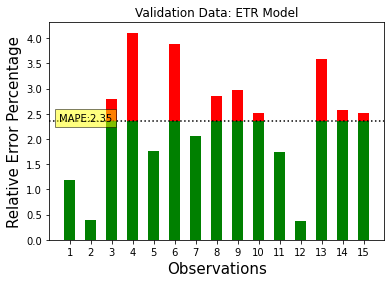

In [129]:
mape_ys=mape.iloc[:,0]

x=[y for y in range(1,16,1)]
w=0.5
threshold=2.35
bar1=np.arange(len(x))
a_threshold = np.maximum(mape_ys - threshold, 0)
b_threshold = np.minimum(mape_ys, threshold)

fig, ax = plt.subplots()
ax.bar(x, b_threshold, w, color="green")
ax.bar(x, a_threshold, w, color="red", bottom=b_threshold)

plt.axhline(threshold, color='black', ls='dotted')

ax.text(0.5, 2.35, "MAPE:2.35", bbox=dict(facecolor='yellow', alpha=0.5))
plt.xticks(x)
plt.xlabel('Observations',fontsize=15)
plt.ylabel('Relative Error Percentage',fontsize=15)
plt.title('Validation Data: ETR Model')

In [110]:
yrf=rf.predict(xval)
mean_squared_error(yval,yrf,squared=False)

0.960656993936967

In [111]:
y_xgbr=xgbr.predict(xval)
mean_squared_error(yval,y_xgbr,squared=False)

1.422745035136793

In [112]:
y_cbr=model_CBR.predict(xval)
mean_squared_error(yval,y_cbr)

1.4535175896794577

In [ ]:
mean_squared_error(yval,ym,squared=False)